In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, \
accuracy_score, precision_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

#Libraries for visualizing trees
from sklearn.tree import export_graphviz 
from six import StringIO
from IPython.display import Image
import time as tm

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
binned_jobs = pd.read_csv("binned_jobs.csv")
binned_jobs.drop(['job_title', 'salary'], axis = 1)

# Convert categorical variables to dummy variables
binned_jobs_encoded = pd.get_dummies(binned_jobs, drop_first=True)

# Separate the features (X) and the target variable (y)
X = binned_jobs_encoded.drop(['salary_in_usd', 'salary'],axis=1)
y = binned_jobs_encoded['salary_in_usd']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [26]:
parameters = {'max_depth': np.arange(5,50,7), "max_features": np.arange(4,10,2), 'max_leaf_nodes': np.arange(1000,2500,200), 'bootstrap':[True, False], 'ccp_alpha': np.arange(0.0, .5, 0.1)}
cv = KFold(n_splits = 2, shuffle=True, random_state=1)
model = RandomizedSearchCV(RandomForestRegressor(random_state=1, n_estimators=50), parameters, n_jobs=-1, n_iter=250, verbose=1, cv=cv, scoring="neg_mean_absolute_error")
model.fit(X_train, y_train)
print (model.best_params_)

Fitting 2 folds for each of 250 candidates, totalling 500 fits
{'max_leaf_nodes': 2400, 'max_features': 4, 'max_depth': 33, 'ccp_alpha': 0.1, 'bootstrap': True}


In [27]:
parameters = {'max_depth': np.arange(5,50,7), "max_features": np.arange(2,10,2), 'max_leaf_nodes': np.arange(2000,4000,500), 'bootstrap':[True], 'ccp_alpha': np.arange(0.05, .15, 0.05)}
cv = KFold(n_splits = 2, shuffle=True, random_state=1)
model2 = RandomizedSearchCV(RandomForestRegressor(random_state=1, n_estimators=50), parameters, n_jobs=-1, n_iter=250, verbose=1, cv=cv, scoring="neg_mean_absolute_error")
model2.fit(X_train, y_train)
print (model2.best_params_)

C:\Users\ctawa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 224 is smaller than n_iter=250. Running 224 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 224 candidates, totalling 448 fits
{'max_leaf_nodes': 2000, 'max_features': 4, 'max_depth': 33, 'ccp_alpha': 0.05, 'bootstrap': True}


In [52]:
parameters = {'max_depth': np.arange(5,50,7), "max_features": np.arange(2,8,1), 'max_leaf_nodes': np.arange(2000,2500,100), 'bootstrap':[True], 'ccp_alpha': np.arange(0.025, .1, 0.025)}
cv = KFold(n_splits = 2, shuffle=True, random_state=1)
model3 = RandomizedSearchCV(RandomForestRegressor(random_state=1, n_estimators=100), parameters, n_jobs=-1, n_iter=250, verbose=1, cv=cv, scoring="neg_mean_absolute_error")
model3.fit(X_train, y_train)
print (model3.best_params_)

Fitting 2 folds for each of 250 candidates, totalling 500 fits
{'max_leaf_nodes': 2400, 'max_features': 4, 'max_depth': 33, 'ccp_alpha': 0.07500000000000001, 'bootstrap': True}


In [49]:
parameters = {'max_depth': [30,33,36], "max_features": [4], 'max_leaf_nodes': [2400], 'bootstrap':[True], 'ccp_alpha': [.075], 'oob_score':[True,False]}
cv = KFold(n_splits = 4, shuffle=True, random_state=1)
model4 = RandomizedSearchCV(RandomForestRegressor(random_state=1, n_estimators=100), parameters, n_jobs=-1, n_iter=250, verbose=1, cv=cv, scoring="neg_mean_absolute_error")
model4.fit(X_train, y_train)
print (model4.best_params_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
{'oob_score': True, 'max_leaf_nodes': 2400, 'max_features': 4, 'max_depth': 36, 'ccp_alpha': 0.075, 'bootstrap': True}


In [33]:
parameters = {'max_depth': [34,36,38], "max_features": [4], 'max_leaf_nodes': [2400], 'bootstrap':[True], 'ccp_alpha': [.075], 'oob_score':[True], 'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}
cv = KFold(n_splits = 4, shuffle=True, random_state=1)
model5 = RandomizedSearchCV(RandomForestRegressor(random_state=1, n_estimators=100), parameters, n_jobs=-1, n_iter=250, verbose=1, cv=cv, scoring="neg_mean_absolute_error")
model5.fit(X_train, y_train)
print (model5.best_params_)

C:\Users\ctawa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 12 is smaller than n_iter=250. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 4 folds for each of 12 candidates, totalling 48 fits
{'oob_score': True, 'max_leaf_nodes': 2400, 'max_features': 4, 'max_depth': 38, 'criterion': 'absolute_error', 'ccp_alpha': 0.075, 'bootstrap': True}


In [34]:
preds = model5.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

49486.09454826788

In [36]:
parameters = {'oob_score': [True], 'max_leaf_nodes': [2400], 'max_features': [4], 'max_depth': [38], 'criterion': ['absolute_error'], 'ccp_alpha': [0.075], 'bootstrap': [True]}
cv = KFold(n_splits = 4, shuffle=True, random_state=1)
model6 = RandomizedSearchCV(RandomForestRegressor(random_state=1, n_estimators=2500), parameters, n_jobs=-1, n_iter=1, verbose=1, cv=cv, scoring="neg_mean_absolute_error")
model6.fit(X_train, y_train)
preds = model6.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


49479.01528064572

In [37]:
mean_absolute_error(y_test, preds)

35597.43756058041

Text(0, 0.5, 'predicted - actual')

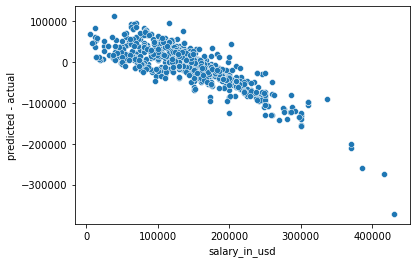

In [45]:
resids = preds - y_test
sns.scatterplot(x=y_test, y=resids)
plt.xlabel("salary_in_usd")
plt.ylabel("predicted - actual")

Text(0.5, 1.0, 'model MAE')

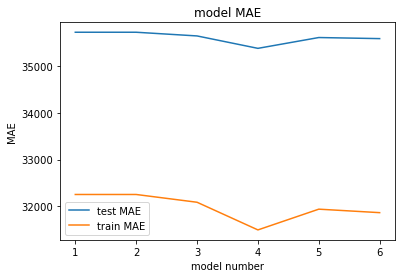

In [57]:
l = [model, model2, model3, model4, model5, model6]
bests = []
bests_t = []
for m in l:
    bests.append(mean_absolute_error(m.predict(X_test), y_test))
    bests_t.append(mean_absolute_error(m.predict(X_train), y_train))
sns.lineplot(x=[1,2,3,4,5,6], y=bests, label="test MAE")
plt.xlabel("model number")
plt.ylabel("MAE")
sns.lineplot(x=[1,2,3,4,5,6], y=bests_t, label = "train MAE")
plt.title("model MAE")

Text(0.5, 1.0, 'model MAE')

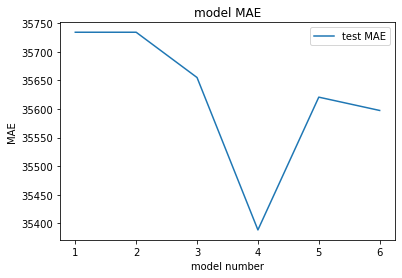

In [58]:
sns.lineplot(x=[1,2,3,4,5,6], y=bests, label="test MAE")
plt.xlabel("model number")
plt.ylabel("MAE")
plt.title("model MAE")

In [54]:
bests

[35734.21531427414,
 35734.21531427414,
 35655.02933215456,
 35388.54260580971,
 35620.710737605805,
 35597.43756058041]

In [59]:
parameters = {'max_depth': [30,33,36], "max_features": [4], 'max_leaf_nodes': [2400], 'bootstrap':[True], 'ccp_alpha': [.075], 'oob_score':[True,False]}
cv = KFold(n_splits = 4, shuffle=True, random_state=1)
model4 = RandomizedSearchCV(RandomForestRegressor(random_state=1, n_estimators=1000), parameters, n_jobs=-1, n_iter=250, verbose=1, cv=cv, scoring="neg_mean_absolute_error")
model4.fit(X_train, y_train)
print (model4.best_params_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
{'oob_score': True, 'max_leaf_nodes': 2400, 'max_features': 4, 'max_depth': 36, 'ccp_alpha': 0.075, 'bootstrap': True}


In [60]:
mean_absolute_error(y_test, model4.predict(X_test))

35292.425234087365